<a href="https://colab.research.google.com/github/J0SAL/Labs/blob/main/SC-IT312/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SC EXP 3
**DISTINGUISH BETWEEN APPLES AND ORANGES** using Perceptron

In [60]:
!python --version

Python 3.7.12


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
e=2.1718

In [62]:
df = pd.read_csv("exp3.csv");
df

,shape,texture,type
0,0.96,0.60,1
1,0.83,-0.43,0
2,0.63,0.97,1
3,0.12,0.88,1
4,0.62,-0.43,0
5,-0.78,0.99,1
6,-0.56,0.71,1
7,0.67,-0.23,0
8,0.73,0.34,1
9,0.27,-0.56,0


**Target Variables and Data Variables**

In [63]:
target = df['type']
data = df[['shape', 'texture']]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state = 42)
X_train.shape

(7, 2)

**Initialising Weights & bias**

In [64]:
w = np.array([0.0,0.0])
b = 1.0;
print("Weights: ", w)
print("Bias: ", b)

Weights:  [0. 0.]
Bias:  1.0


**Training**

In [65]:
# defining the epochs and learning rate
learning_rate = 0.7
epochs = 20
epoch_cost_list = []

#for each epoch
for i in range(epochs):
  epoch_cost = 0

  x_train = np.array(X_train)
  for xi, target in zip(x_train, y_train):
    #net input
    yin = np.dot(xi, w) +b

    #activation function
    pred = 1/(1+(e**(-yin)))

    #calculating cost
    cost = math.sqrt(np.square(target - pred))
    epoch_cost += float(cost/len(X_train))

    #update weights and biases

    update = learning_rate * (target - pred)
    w += (update * xi)
    b += update

  # Store MSE through every epoch iteration
  print("Cost after epoch {} : {} ".format(i+1, epoch_cost))
  epoch_cost_list.append(epoch_cost)

Cost after epoch 1 : 0.4493474001465489 
Cost after epoch 2 : 0.3306222008696634 
Cost after epoch 3 : 0.2536897555231315 
Cost after epoch 4 : 0.204237366630532 
Cost after epoch 5 : 0.17070250983802981 
Cost after epoch 6 : 0.14668684566536122 
Cost after epoch 7 : 0.12870076542898784 
Cost after epoch 8 : 0.1147430684803953 
Cost after epoch 9 : 0.10359990999856473 
Cost after epoch 10 : 0.09449712547740473 
Cost after epoch 11 : 0.08691937527515942 
Cost after epoch 12 : 0.08051096648938441 
Cost after epoch 13 : 0.07501873602255633 
Cost after epoch 14 : 0.07025769897376441 
Cost after epoch 15 : 0.06608959003533335 
Cost after epoch 16 : 0.062409007119473524 
Cost after epoch 17 : 0.059134200094947305 
Cost after epoch 18 : 0.05620078856269779 
Cost after epoch 19 : 0.05355737888523168 
Cost after epoch 20 : 0.05116244376094474 


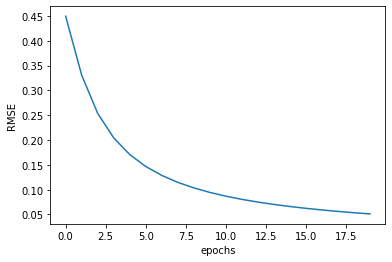

In [66]:
plt.plot(epoch_cost_list)
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.show()

In [67]:
print("Value of weights and bias after training w{} : b:{}".format(w,b))

Value of weights and bias after training w[-1.05070609  6.86135182] : b:-0.45425690300498184


In [73]:
def test(x):
  yinx = np.dot(x,w)+b
  # using binary sigmodial
  predx = 1/(1+(e**(-yinx)))
  return predx


In [74]:
X_test

,shape,texture
8,0.73,0.34
1,0.83,-0.43
5,-0.78,0.99


In [75]:
x_test = np.array(X_test)
print("Actual\tPredicted")
for x,y in zip(x_test, y_test):
  y_pred = test(x)
  print(y,"\t",y_pred)

Actual	Predicted
1 	 0.7030989104511617
0 	 0.034997957983181324
1 	 0.9961332129353841


In [76]:
shape = 0.83
texture = -0.43

# 1: Apple | 0: Orange
if round(test([shape, texture])):
  print("Apple")
else:
  print("Orange")

Orange


In [77]:
shape = -0.43
texture = 0.99
if round(test([shape, texture])):
  print("Apple")
else:
  print("Orange")

Apple
